### KIVA DATASET ANALYSIS (Rwanda emphasis).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('kiva_loans.csv')
data

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [5]:
data.country.unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [6]:
rwanda_data = data[data.country=='Rwanda']

In [7]:
# check for null values
rwanda_data.isnull().sum()/len(rwanda_data)*100

id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.222717
country_code           0.000000
country                0.000000
region                91.135857
currency               0.000000
partner_id             0.000000
posted_time            0.000000
disbursed_time         0.000000
funded_time            8.195991
term_in_months         0.000000
lender_count           0.000000
tags                  24.231626
borrower_genders       0.207869
repayment_interval     0.000000
date                   0.000000
dtype: float64

In [8]:
# check for duplicates
data.duplicated().sum()

np.int64(0)

In [9]:
# top 5 countries sorted by sum of disbursed loans

data.groupby('country').loan_amount.sum().sort_values(ascending=False).head(5)

country
Philippines      55342225.0
Kenya            34534300.0
United States    31496375.0
Peru             30867400.0
Paraguay         29629075.0
Name: loan_amount, dtype: float64

In [10]:
# disbursed loans metrics

l_count = rwanda_data.loan_amount.count()
l_sum = rwanda_data.loan_amount.sum()
l_avg = rwanda_data.loan_amount.mean()

print(f'a total of {l_count} loans, adding up to USD{l_sum: .2f} \nand an average loan amount of USD{l_avg: .2f}')

a total of 6735 loans, adding up to USD 16646300.00 
and an average loan amount of USD 2471.61


In [11]:
# loan distribution across sectors
rwanda_data.sector.unique()

array(['Food', 'Construction', 'Retail', 'Clothing', 'Agriculture',
       'Personal Use', 'Services', 'Transportation', 'Manufacturing',
       'Arts', 'Health', 'Education', 'Entertainment', 'Housing',
       'Wholesale'], dtype=object)

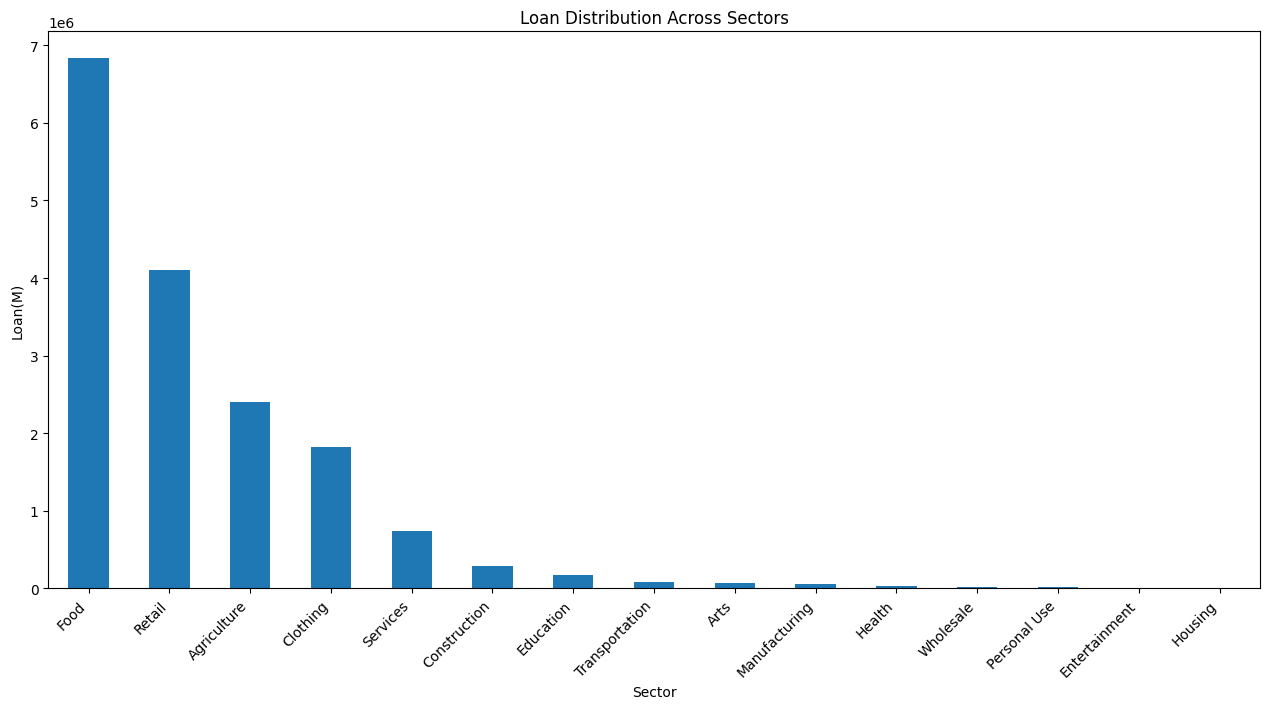

In [12]:
sector_dist = rwanda_data.groupby('sector').loan_amount.sum().sort_values(ascending=False)
sector_dist.plot(kind='bar', title='Loan Distribution Across Sectors', ylabel='Loan(M)', xlabel='Sector', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# sector_dist.head(5)

In [13]:
# number of unique partner and most involved partners by loan amount

id_count = len(rwanda_data.partner_id.unique())
id_ranking = rwanda_data.groupby('partner_id').loan_amount.sum().sort_values(ascending=False)

print(f'Rwanda has {id_count} unique partners.')

Rwanda has 8 unique partners.


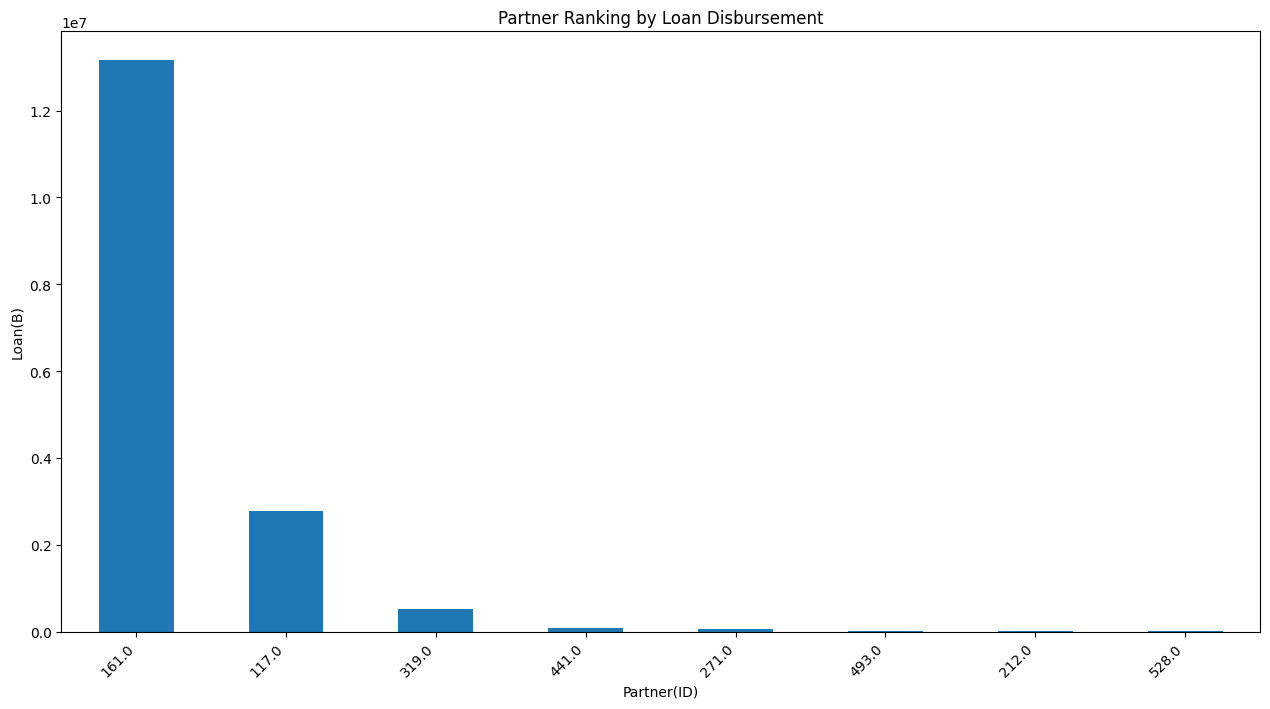

In [14]:
id_ranking.plot(kind='bar', title='Partner Ranking by Loan Disbursement', ylabel='Loan(B)', xlabel='Partner(ID)', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# borrower distribution by gender within activities

g_distm = rwanda_data[rwanda_data.borrower_genders=='male'].groupby('activity').size().rename('Male').sort_values(ascending=True)
g_distf = rwanda_data[rwanda_data.borrower_genders=='female'].groupby('activity').size().rename('Female').sort_values(ascending=True)
gender_counts = pd.concat([g_distm, g_distf], axis=1).dropna(axis=0)

In [16]:
g_dist_cent = (gender_counts.Male>gender_counts.Female).sum()/len(gender_counts)*100
print(f'Males account for only{g_dist_cent: .2f} percent of all borrowers in Rwanda.\nFemales take up the remaining{100 - g_dist_cent: .2f} percent.')

Males account for only 27.12 percent of all borrowers in Rwanda.
Females take up the remaining 72.88 percent.


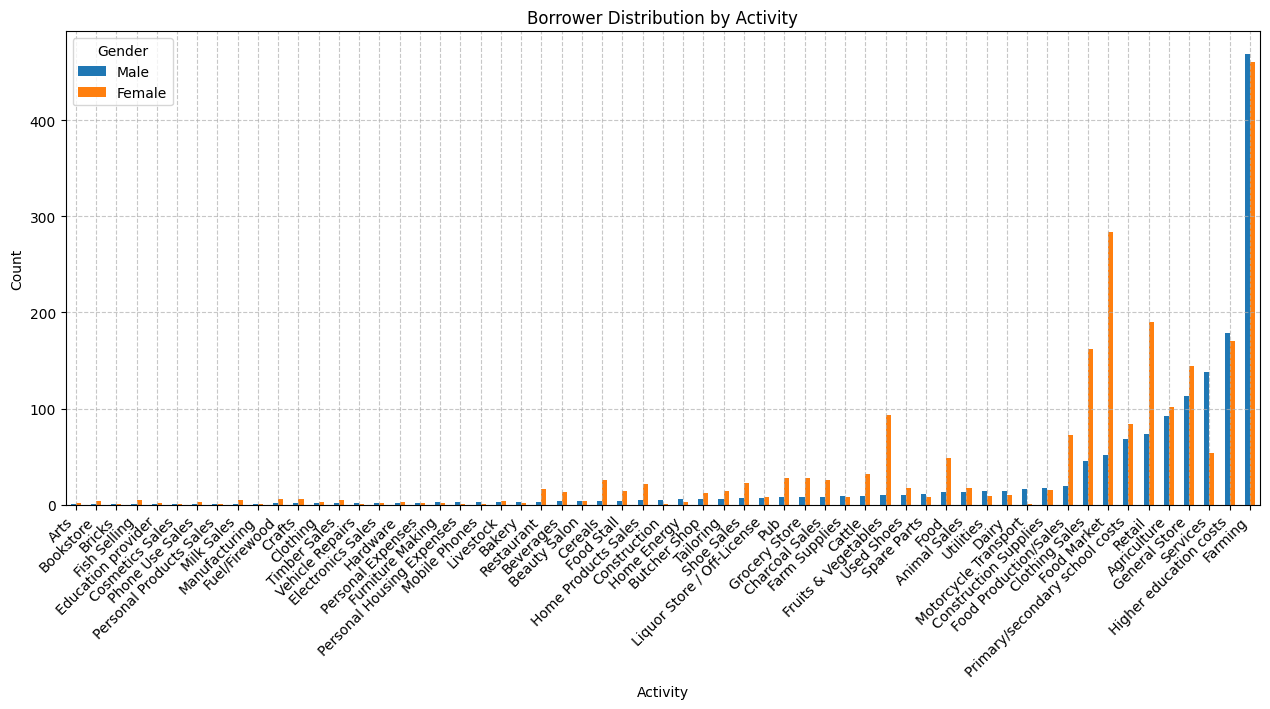

In [17]:
gender_counts.plot(kind='bar', title='Borrower Distribution by Activity', xlabel='Activity', ylabel='Count', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
# loan amounts by region
# the region column had the highest percentage of null values
# we'll work with only available data

region_data = rwanda_data.dropna(subset=['region'])

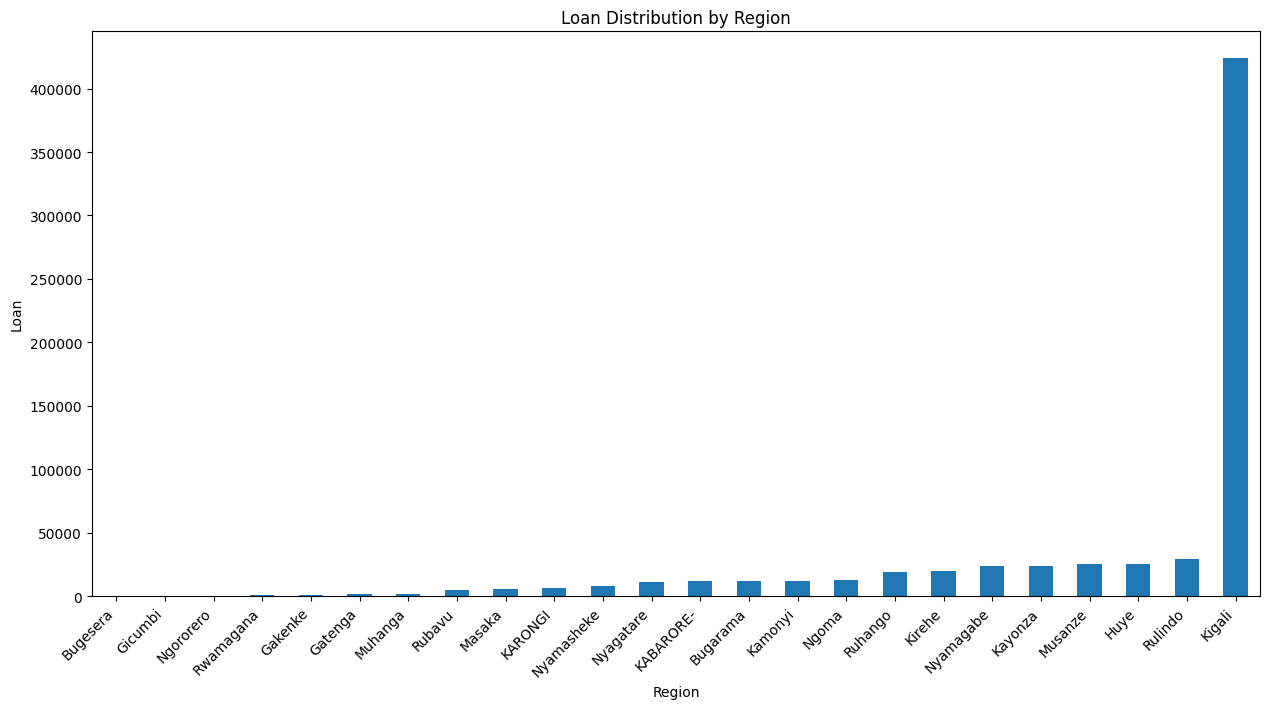

In [19]:
regionl_data = region_data.groupby('region').loan_amount.sum().sort_values(ascending=True)
regionl_data.plot(kind='bar', title='Loan Distribution by Region', xlabel='Region', ylabel='Loan',figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<positron-console-cell-20>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<positron-console-cell-20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


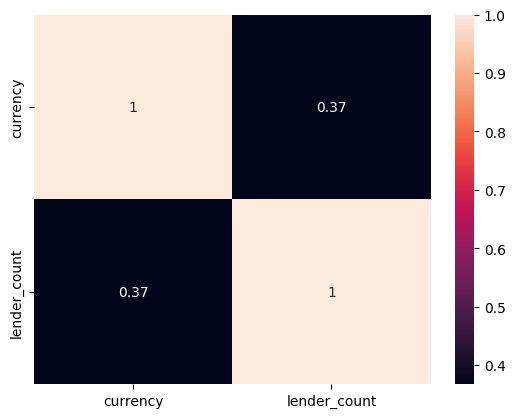

In [20]:
# correlation between disbursement currency and lender count 
# i still struggle to make sense of these

hmap_data = rwanda_data[['currency', 'lender_count']]
hmap_data.currency.replace({'RWF': 1, 'USD': 2}, inplace=True)

corr = hmap_data.corr()

sns.heatmap(corr, annot=True)
plt.show()


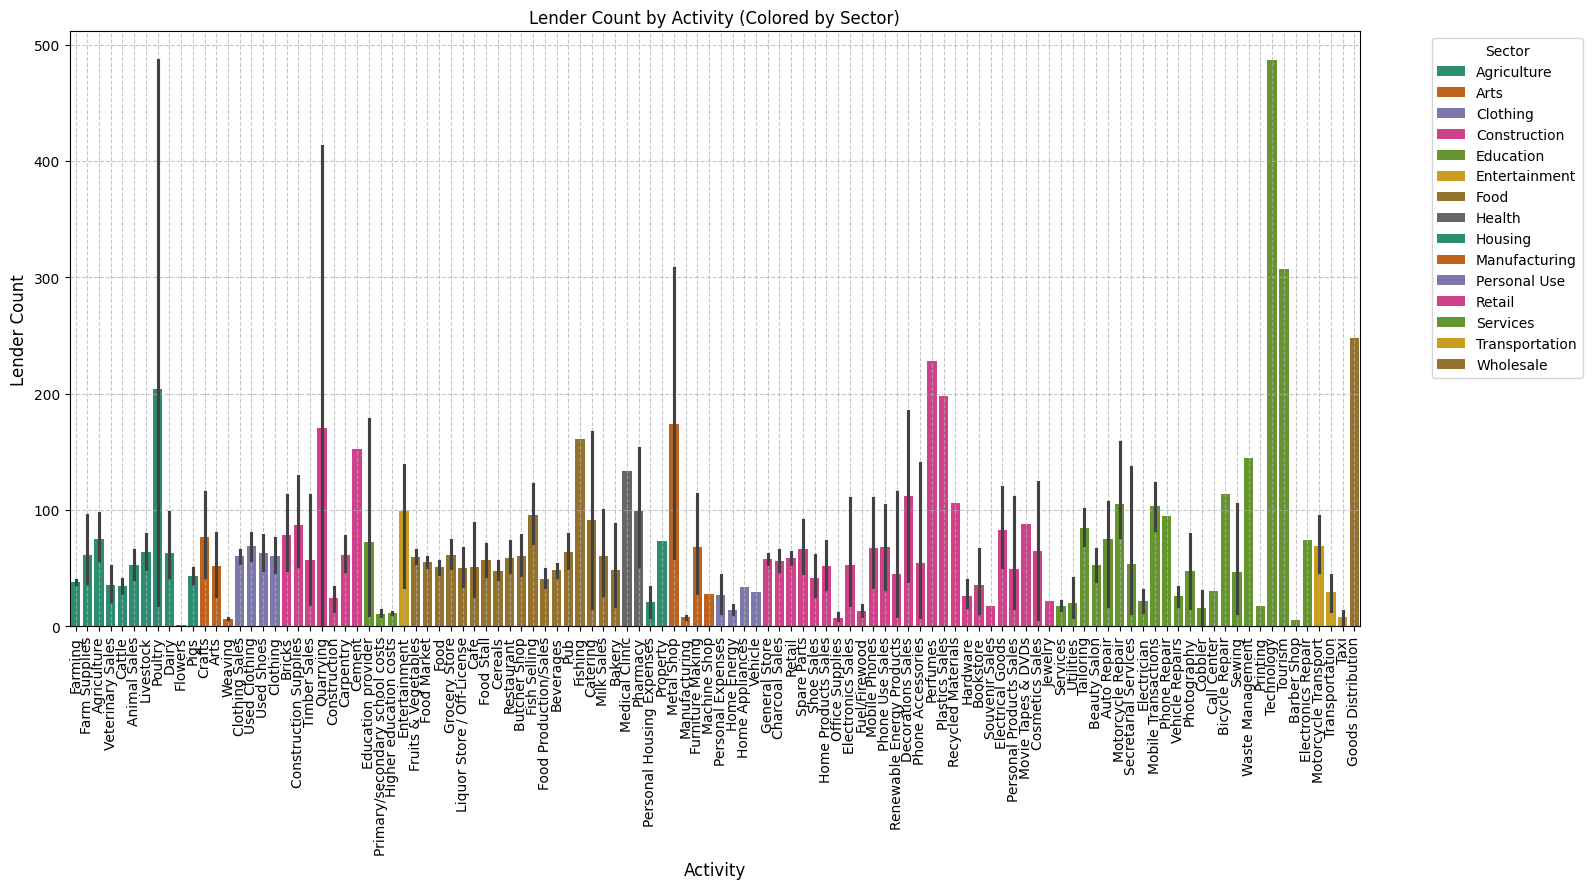

In [61]:
# how the number of lenders vary across different activities

grp_rwanda_data = rwanda_data.sort_values(by= 'sector', ascending=True)

plt.figure(figsize=(16, 9))
sns.barplot(data=grp_rwanda_data, x='activity', y='lender_count', hue='sector', palette='Dark2', dodge=False)
plt.title('Lender Count by Activity (Colored by Sector)')
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Lender Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [22]:
# lender count by different sector

def print_avg_lender_count_by_sector(rwanda_data):
    grouped = rwanda_data.groupby('sector').lender_count.mean()
    print(grouped)

print_avg_lender_count_by_sector(rwanda_data)

sector
Agriculture        46.051554
Arts               63.409091
Clothing           61.044563
Construction       79.772727
Education          11.401186
Entertainment      99.333333
Food               55.159101
Health            103.625000
Housing            31.400000
Manufacturing      88.333333
Personal Use       18.347826
Retail             57.587674
Services           37.128266
Transportation     61.451613
Wholesale         248.000000
Name: lender_count, dtype: float64


In [23]:
# trends across time
# features to examined; funded amount(yearly trend), loan/disbursed amount(yearly and monthly trend)

timed_rwanda_data = rwanda_data[['funded_amount', 'loan_amount', 'sector', 'posted_time','disbursed_time', 'funded_time', 'lender_count']]
timed_rwanda_data = timed_rwanda_data.dropna(subset=['funded_time'])

date_cols = ['posted_time', 'funded_time', 'disbursed_time']
for col in date_cols:
    timed_rwanda_data[col] = pd.to_datetime(timed_rwanda_data[col], utc=True)

# date validation check
invalid_posted = (timed_rwanda_data['disbursed_time'] > timed_rwanda_data['posted_time']).sum()
print(f"Invalid posted before disbursed: {invalid_posted}")

# dropping invalid dates
timed_clean = timed_rwanda_data[timed_rwanda_data['disbursed_time'] <= timed_rwanda_data['posted_time']].copy()


Invalid posted before disbursed: 51


In [24]:
# average loan repayment interval 

def get_percentage_distribution(df, column_name):
    distribution = df[column_name].value_counts(normalize=True) * 100
    for interval_type, percentage in distribution.items():
        print(f"{interval_type}: {percentage:.2f}%")


get_percentage_distribution(rwanda_data, 'repayment_interval')

irregular: 64.10%
monthly: 21.66%
bullet: 14.24%


In [25]:
# average loan repayment interval function probably works for tag distribution as well

def get_percentage_distribution(df, column_name):
    distribution = df[column_name].value_counts(normalize=True, sort=True) * 100
    for tag, percentage in distribution.items():
        print(f"{tag}: {percentage:.2f}%")


get_percentage_distribution(rwanda_data, 'tags')

user_favorite: 6.45%
#Parent: 3.37%
#Parent, #Woman Owned Biz: 2.68%
#Parent, #Woman Owned Biz, user_favorite: 1.74%
#Parent, user_favorite: 1.69%
user_favorite, user_favorite: 1.47%
#Parent, #Vegan: 1.41%
#Parent, #Schooling, #Woman Owned Biz: 1.33%
#Parent, #Schooling: 1.31%
#Parent, #Woman Owned Biz, user_favorite, user_favorite: 0.98%
#Parent, #Schooling, #Vegan: 0.92%
#Parent, #Vegan, user_favorite: 0.90%
#Schooling: 0.88%
volunteer_pick, volunteer_like: 0.82%
#Parent, #Schooling, #Woman Owned Biz, user_favorite: 0.67%
user_favorite, #Parent, #Woman Owned Biz: 0.65%
#Schooling, #Parent: 0.65%
#Parent, #Woman Owned Biz, #Vegan: 0.63%
#Eco-friendly, #Biz Durable Asset, #Technology: 0.63%
#Parent, #Schooling, user_favorite: 0.63%
#Parent, #Vegan, #Woman Owned Biz: 0.61%
user_favorite, #Parent: 0.59%
volunteer_pick: 0.55%
#Technology, #Eco-friendly: 0.55%
#Parent, user_favorite, user_favorite: 0.49%
#Schooling, #Technology: 0.47%
#Parent, #Woman Owned Biz, #Schooling: 0.47%
#Parent, #

In [26]:
# average term in months for loans across different sectors

loan_terms = rwanda_data[['term_in_months', 'sector']]
loan_terms
print(f'the average loan term is {loan_terms.term_in_months.mean(): .0f} months.')

loan_terms_sector = loan_terms.groupby('sector').mean().sort_values(by='term_in_months', ascending=False)
loan_terms_sector

the average loan term is  11 months.


,term_in_months
sector,
Services,26.280285
Personal Use,24.434783
Education,23.958498
Wholesale,19.000000
Housing,14.000000
Transportation,11.967742
Agriculture,10.135593
Manufacturing,9.277778
Construction,8.875000


In [27]:
# average duration for a loan to be funded after being posted

timed_clean['funding_duration'] = (timed_clean['funded_time'] - timed_clean['posted_time']).dt.days
funding_time = timed_clean.funding_duration.mean()

print(f'it takes roughly {funding_time: .0f} days for a posted loan to be funded.')

it takes roughly  15 days for a posted loan to be funded.


In [28]:
# funding amount over the years
# loan amount peak(s) within the year
# timed_clean.sort_values(by='funded_time', ascending=True)

yearly_trend = timed_clean.groupby(timed_clean.funded_time.dt.year).agg({
    'funded_time': 'count',
    'loan_amount': 'sum',
    'funded_amount': 'sum'
}).round(0).astype(int)

yearly_trend.columns = ['loans_count', 'loan_amount_requested', 'loan_amount_funded']
print(yearly_trend)

             loans_count  loan_amount_requested  loan_amount_funded
funded_time                                                        
2014                1750                2105850             2105850
2015                1907                4153950             4153950
2016                1713                4759875             4759875
2017                 762                3111225             3111225


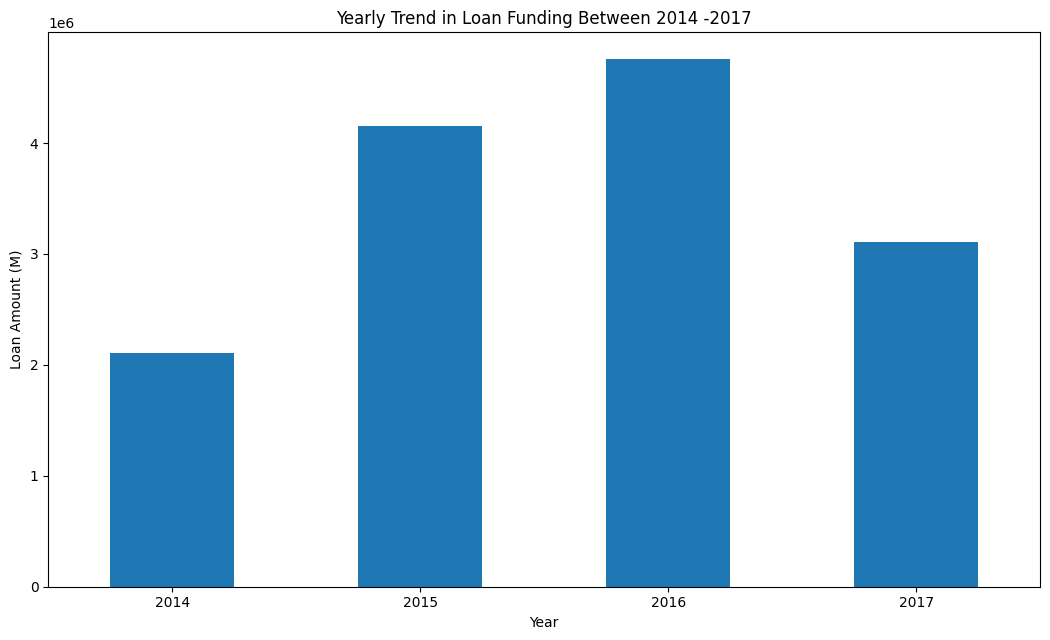

In [60]:
# continuos growth, low 2017 numbers likely due to incomplete data for 2017

yearly_trend['loan_amount_funded'].plot(kind='bar', xlabel= 'Year', ylabel='Loan Amount (M)', figsize=(12.8, 7.2))

plt.title('Yearly Trend in Loan Funding Between 2014 -2017')
plt.xticks(rotation=0)
plt.show()

In [30]:
timed_clean.funded_time.sort_values(ascending=True)

3871     2014-01-14 18:35:31+00:00
4015     2014-01-14 18:38:49+00:00
4090     2014-01-14 19:23:00+00:00
4227     2014-01-14 19:59:16+00:00
3934     2014-01-14 22:02:59+00:00
                    ...           
669175   2017-07-14 22:19:50+00:00
663942   2017-07-14 22:27:26+00:00
663733   2017-07-14 23:14:14+00:00
663646   2017-07-15 12:32:43+00:00
663515   2017-07-15 17:31:22+00:00
Name: funded_time, Length: 6132, dtype: datetime64[ns, UTC]

In [31]:
yearly_trend['fund_rate'] = yearly_trend['loan_amount_funded'] / yearly_trend['loan_amount_requested']
yearly_trend

,loans_count,loan_amount_requested,loan_amount_funded,fund_rate
funded_time,,,,
2014,1750,2105850,2105850,1.0
2015,1907,4153950,4153950,1.0
2016,1713,4759875,4759875,1.0
2017,762,3111225,3111225,1.0


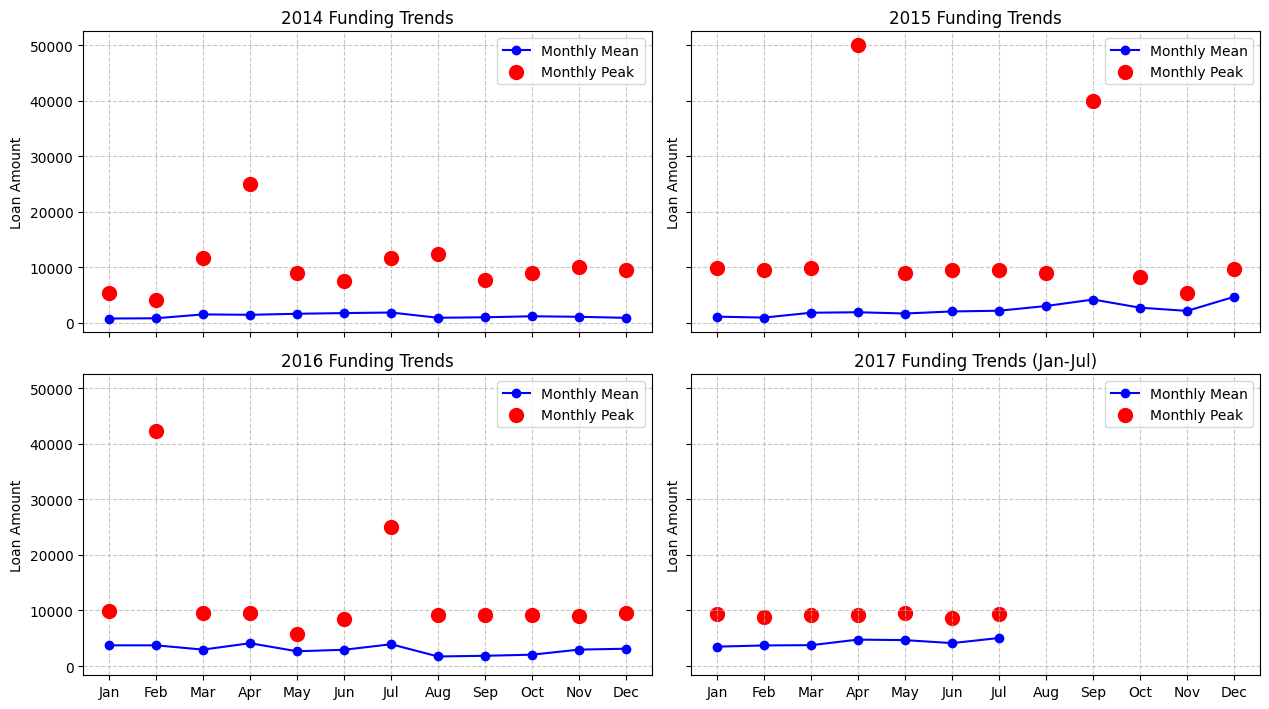

In [33]:
years = [2014, 2015, 2016]
fig, axes = plt.subplots(2, 2, figsize=(12.8, 7.2), sharey=True, sharex=True)
axes = axes.flatten()

for i, year in enumerate(years):
    year_data = timed_clean[timed_clean.funded_time.dt.year == year]
    
    monthly_stats = year_data.groupby(year_data.funded_time.dt.month).agg({
        'loan_amount': ['mean', 'max']
    })
    
    monthly_stats.columns = ['month_mean', 'month_max']
    monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
   
    axes[i].plot(monthly_stats.index, monthly_stats.month_mean, 'b-o', label='Monthly Mean')
    axes[i].scatter(monthly_stats.index, monthly_stats.month_max, color='red', s=100, 
                    label='Monthly Peak', zorder=5)
    axes[i].set_title(f'{year} Funding Trends')
    axes[i].set_ylabel('Loan Amount')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()


year_data_2017 = timed_clean[timed_clean.funded_time.dt.year == 2017]
monthly_stats_2017 = year_data_2017.groupby(year_data_2017.funded_time.dt.month).agg({
    'loan_amount': ['mean', 'max']
})

monthly_stats_2017.columns = ['month_mean', 'month_max']
monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[3].plot(monthly_stats.index[:7], monthly_stats_2017.month_mean, 'b-o', label='Monthly Mean')
axes[3].scatter(monthly_stats.index[:7], monthly_stats_2017.month_max, color='red', s=100, label='Monthly Peak')
axes[3].set_title('2017 Funding Trends (Jan-Jul)')
axes[3].set_ylabel('Loan Amount')
axes[3].grid(True, linestyle='--', alpha=0.7)
axes[3].legend()

plt.tight_layout()
plt.show()

In [34]:
# some primitive nlp on the 'use' column using nltk

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

nltk.download(['punkt', 'stopwords', 'punkt_tab', 'averaged_perceptron_tagger_eng'])


[nltk_data] Downloading package punkt to /home/eebrhm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/eebrhm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/eebrhm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/eebrhm/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [35]:
text_rwanda_data = rwanda_data.dropna(subset=['use'])

In [36]:
trigger_words = ['buy', 'purchase', 'pay']
stop_words = set(stopwords.words('english'))

def get_buy_targets(text):
    tokens = word_tokenize(str(text).lower())   # label every word with its Part of Speech
    tagged_tokens = pos_tag(tokens)             # only keep words that are NOUNS

    
    # look for the nouns that appear after trigger_words in the original sentence
    targets = [w for w, tag in tagged_tokens if tag.startswith('N') and w not in stop_words]

    if any(w in tokens for w in trigger_words):
         return targets
    else:
        return []

text_rwanda_data['buy_targets'] = text_rwanda_data['use'].apply(get_buy_targets)
text_rwanda_data

<positron-console-cell-36>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,buy_targets
3871,657106,600.0,600.0,Fruits & Vegetables,Food,To buy more vegetables for sale.,RW,Rwanda,NaN,RWF,161.0,2014-01-14 12:56:30+00:00,2013-12-16 08:00:00+00:00,2014-01-14 18:35:31+00:00,6.0,2,NaN,female,irregular,2014-01-14,"[vegetables, sale]"
3934,657136,4000.0,4000.0,Food Production/Sales,Food,"to buy more beans, rice, and maize to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 13:53:13+00:00,2013-12-30 08:00:00+00:00,2014-01-14 22:02:59+00:00,6.0,45,NaN,"female, male, female, female, female, male, fe...",irregular,2014-01-14,"[beans, rice]"
4015,657104,600.0,600.0,Food Market,Food,"to buy more rice, sugar, and charcoal to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 12:49:49+00:00,2013-12-16 08:00:00+00:00,2014-01-14 18:38:49+00:00,6.0,2,NaN,female,irregular,2014-01-14,"[rice, sugar, charcoal]"
4036,657116,1200.0,1200.0,Construction Supplies,Construction,to buy more glasses for sale.,RW,Rwanda,NaN,RWF,161.0,2014-01-14 13:20:57+00:00,2013-12-16 08:00:00+00:00,2014-01-17 16:52:59+00:00,14.0,46,"#Repeat Borrower, #Biz Durable Asset, #Parent",female,monthly,2014-01-14,"[glasses, sale]"
4090,657120,600.0,600.0,General Store,Retail,to buy more beans and cooking oil for sale.,RW,Rwanda,NaN,RWF,161.0,2014-01-14 13:26:31+00:00,2013-12-16 08:00:00+00:00,2014-01-14 19:23:00+00:00,6.0,2,NaN,female,irregular,2014-01-14,"[beans, oil, sale]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670248,1335939,0.0,8275.0,Grocery Store,Food,"to buy more milk, biscuits, and juice for sale.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 13:33:18+00:00,2017-06-28 07:00:00+00:00,NaN,6.0,0,"#Parent, #Woman Owned Biz","female, female, male, female, male, female, ma...",irregular,2017-07-07,"[milk, biscuits, juice, sale]"
670332,1335975,0.0,7675.0,Food Market,Food,"to buy more cassava, bananas and beans to sell.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 14:52:49+00:00,2017-06-21 07:00:00+00:00,NaN,6.0,0,#Elderly,"female, female, female, female, female, female...",irregular,2017-07-07,"[cassava, bananas, beans]"
670337,1335968,0.0,3475.0,Clothing Sales,Clothing,to buy more women's clothes such as skirts and...,RW,Rwanda,NaN,RWF,161.0,2017-07-07 14:35:24+00:00,2017-06-28 07:00:00+00:00,NaN,6.0,0,"#Parent, #Woman Owned Biz","female, female, male, male, female, male, male...",irregular,2017-07-07,"[women, clothes, skirts, shirts, sell]"
670375,1335957,0.0,5725.0,Retail,Retail,"to buy more sugar, salt and rice to sell.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 13:54:03+00:00,2017-06-20 07:00:00+00:00,NaN,10.0,0,"#Parent, #Woman Owned Biz","female, female, female, female, female, female...",irregular,2017-07-07,"[sugar, salt, rice]"


In [37]:
exploded_text = text_rwanda_data.explode('buy_targets').dropna(subset=['buy_targets'])
bad_targets = ['sale', 'sell', 'maise'] # more efficient since; don't have to rerun NLTK function on the whole dataset; just filter my results.
exploded_text = exploded_text[~exploded_text.buy_targets.isin(bad_targets)]
exploded_text


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,buy_targets
3871,657106,600.0,600.0,Fruits & Vegetables,Food,To buy more vegetables for sale.,RW,Rwanda,NaN,RWF,161.0,2014-01-14 12:56:30+00:00,2013-12-16 08:00:00+00:00,2014-01-14 18:35:31+00:00,6.0,2,NaN,female,irregular,2014-01-14,vegetables
3934,657136,4000.0,4000.0,Food Production/Sales,Food,"to buy more beans, rice, and maize to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 13:53:13+00:00,2013-12-30 08:00:00+00:00,2014-01-14 22:02:59+00:00,6.0,45,NaN,"female, male, female, female, female, male, fe...",irregular,2014-01-14,beans
3934,657136,4000.0,4000.0,Food Production/Sales,Food,"to buy more beans, rice, and maize to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 13:53:13+00:00,2013-12-30 08:00:00+00:00,2014-01-14 22:02:59+00:00,6.0,45,NaN,"female, male, female, female, female, male, fe...",irregular,2014-01-14,rice
4015,657104,600.0,600.0,Food Market,Food,"to buy more rice, sugar, and charcoal to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 12:49:49+00:00,2013-12-16 08:00:00+00:00,2014-01-14 18:38:49+00:00,6.0,2,NaN,female,irregular,2014-01-14,rice
4015,657104,600.0,600.0,Food Market,Food,"to buy more rice, sugar, and charcoal to sell.",RW,Rwanda,NaN,RWF,161.0,2014-01-14 12:49:49+00:00,2013-12-16 08:00:00+00:00,2014-01-14 18:38:49+00:00,6.0,2,NaN,female,irregular,2014-01-14,sugar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670375,1335957,0.0,5725.0,Retail,Retail,"to buy more sugar, salt and rice to sell.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 13:54:03+00:00,2017-06-20 07:00:00+00:00,NaN,10.0,0,"#Parent, #Woman Owned Biz","female, female, female, female, female, female...",irregular,2017-07-07,sugar
670375,1335957,0.0,5725.0,Retail,Retail,"to buy more sugar, salt and rice to sell.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 13:54:03+00:00,2017-06-20 07:00:00+00:00,NaN,10.0,0,"#Parent, #Woman Owned Biz","female, female, female, female, female, female...",irregular,2017-07-07,salt
670375,1335957,0.0,5725.0,Retail,Retail,"to buy more sugar, salt and rice to sell.",RW,Rwanda,NaN,RWF,161.0,2017-07-07 13:54:03+00:00,2017-06-20 07:00:00+00:00,NaN,10.0,0,"#Parent, #Woman Owned Biz","female, female, female, female, female, female...",irregular,2017-07-07,rice
670439,1335974,0.0,2650.0,Beverages,Food,to buy more sorghum for making local drinks to...,RW,Rwanda,NaN,RWF,161.0,2017-07-07 14:51:19+00:00,2017-06-19 07:00:00+00:00,NaN,6.0,0,"#Woman Owned Biz, #Elderly","female, female, male, female, female, female, ...",irregular,2017-07-07,sorghum


In [38]:
text_insight = exploded_text.groupby('buy_targets').loan_amount.agg(['count', 'mean', 'min', 'max']).sort_values(by='count', ascending=False)
text_insight.head(20)

,count,mean,min,max
buy_targets,,,,
rice,1176,2792.942177,25.0,12025.0
sugar,831,3193.110710,150.0,9975.0
beans,777,3020.238095,25.0,9975.0
maize,575,1505.782609,25.0,9050.0
sorghum,540,2774.074074,75.0,9475.0
community,528,2553.125000,250.0,6050.0
bananas,477,3026.624738,50.0,9575.0
oil,470,3198.723404,150.0,9975.0
fertilizers,448,1360.156250,25.0,8975.0


In [43]:
# some primitive ml to finish to wrap things up 
# using linear regression to estimate the total loan amount for 2017 using data from previous years
# handled the abstraction, got some help with the code

import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Aggregate data with unique names for year and month
monthly_data = timed_clean.groupby([
    timed_clean.funded_time.dt.year.rename('year'), 
    timed_clean.funded_time.dt.month.rename('month')
])['loan_amount'].sum().reset_index().rename(columns={'loan_amount': 'total_loaned'})

# 2. Create a "Time Index" (1, 2, 3...) to show a continuous timeline
# This helps the model see the growth from 2014 through 2017
monthly_data['time_index'] = (monthly_data['year'] - 2014) * 12 + monthly_data['month']

# 3. Split into Train (data we have) and Test (months we want to predict)
# We know Jan 2014 to July 2017 is roughly indices 1 to 43
X_train = monthly_data[['time_index']] 
y_train = monthly_data['total_loaned']

# 4. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Create the "Future" indices for Aug-Dec 2017 (Months 44 to 48)
future_months = np.array([[44], [45], [46], [47], [48]])
predictions = model.predict(future_months)

# 6. Print the results
print("--- PREDICTIONS FOR MISSING 2017 MONTHS ---")
months_names = ["August", "September", "October", "November", "December"]
for name, pred in zip(months_names, predictions):
    print(f"{name} 2017: ${pred:,.2f}")

# Optional: What would the total for 2017 look like?
actual_2017_incomplete = y_train[monthly_data['year'] == 2017].sum()
predicted_2017_remainder = predictions.sum()
print(f"\nEstimated Total for 2017: ${actual_2017_incomplete + predicted_2017_remainder:,.2f}")



--- PREDICTIONS FOR MISSING 2017 MONTHS ---
August 2017: $503,190.37
September 2017: $511,125.13
October 2017: $519,059.89
November 2017: $526,994.65
December 2017: $534,929.42

Estimated Total for 2017: $5,706,524.46


/home/eebrhm/PTFLIO.2026/c38.project/.venv/lib64/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/eebrhm/PTFLIO.2026/c38.project/.venv/lib64/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


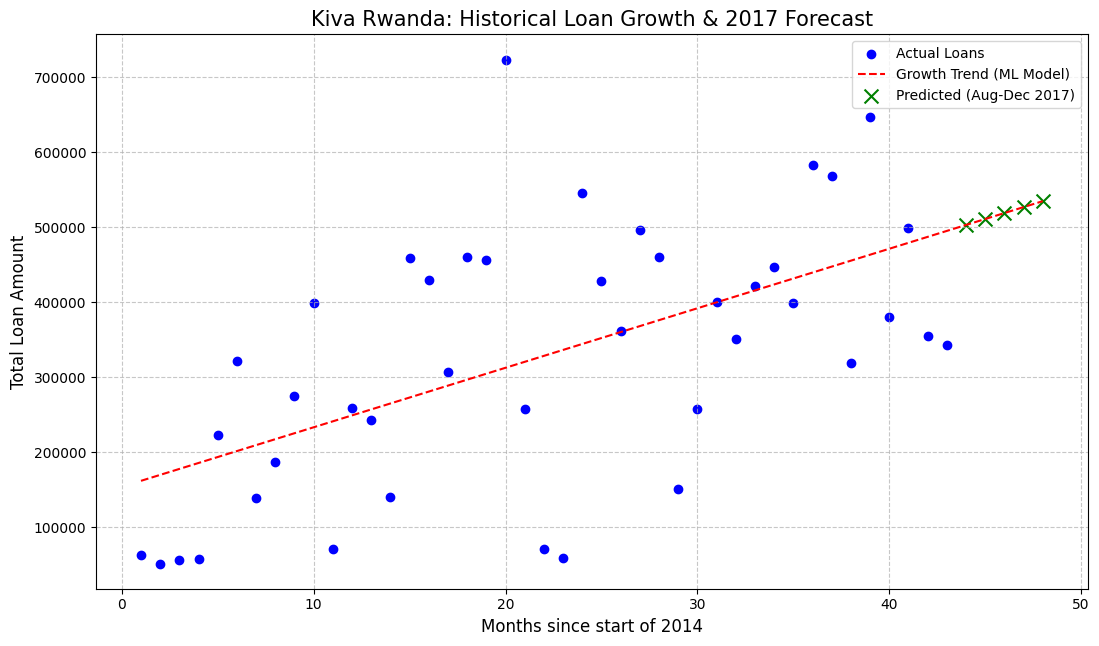

In [54]:
plt.figure(figsize=(12.8, 7.2))

# the historical actuals
plt.scatter(monthly_data['time_index'], monthly_data['total_loaned'], color='blue', label='Actual Loans')

# Trendline using the model to predict values for the entire time range
all_time_indices = np.arange(monthly_data['time_index'].min(), 49).reshape(-1, 1)
trend_line = model.predict(all_time_indices)
plt.plot(all_time_indices, trend_line, color='red', linestyle='--', label='Growth Trend (ML Model)')

# the Predictions
plt.scatter(range(44, 49), predictions, color='green', marker='x', s=100, label='Predicted (Aug-Dec 2017)')

plt.title('Kiva Rwanda: Historical Loan Growth & 2017 Forecast', fontsize=15)
plt.xlabel('Months since start of 2014', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

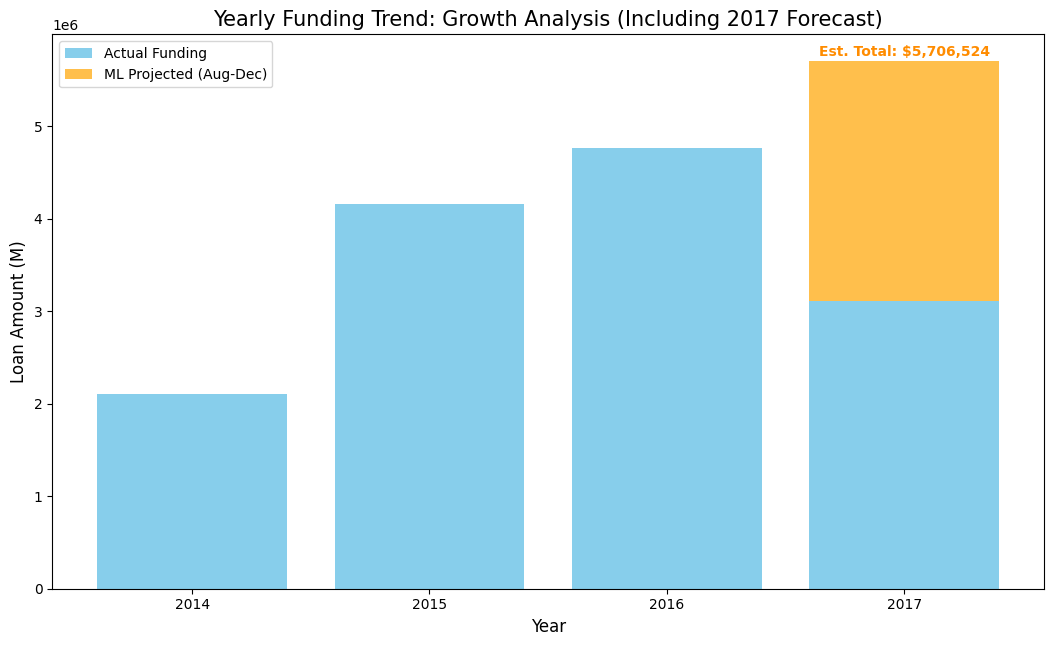

In [53]:

years = [2014, 2015, 2016, 2017]

# These are the actual values from your yearly_trend dataframe
actual_funding = [
    yearly_trend.loc[2014, 'loan_amount_funded'],
    yearly_trend.loc[2015, 'loan_amount_funded'],
    yearly_trend.loc[2016, 'loan_amount_funded'],
    yearly_trend.loc[2017, 'loan_amount_funded'] # This is the "incomplete" 3.1M
]

# 2. Create an array for the projected amount (0 for past years, X for 2017)
# Use the 'predicted_2017_remainder' we calculated in the ML step
projected_funding = [0, 0, 0, predicted_2017_remainder]

# 3. Plotting
plt.figure(figsize=(12.8, 7.2))

# Plot the Actuals
plt.bar(years, actual_funding, color='skyblue', label='Actual Funding')

# Plot the Projected part ON TOP of the 2017 actual bar
plt.bar(years, projected_funding, bottom=actual_funding, 
        color='orange', alpha=0.7, label='ML Projected (Aug-Dec)')

# Add formatting
plt.title('Yearly Funding Trend: Growth Analysis (Including 2017 Forecast)', fontsize=15)
plt.ylabel('Loan Amount (M)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(years)
plt.legend()

# Optional: Add a text label on top of the 2017 bar to show the total
total_2017 = actual_funding[3] + projected_funding[3]
plt.text(2017, total_2017 + 50000, f'Est. Total: ${total_2017:,.0f}', 
         ha='center', fontweight='bold', color='darkorange')

plt.show()